# COMP S493F Lab 5

In [2]:
%env TF_CPP_MIN_LOG_LEVEL=2

env: TF_CPP_MIN_LOG_LEVEL=2


In this lesson, you'll work on:

- multiclass classification and binary classification tasks, and
- designing a neural network for classification.

### Student name: *LO TSZ KIN*

# Multiclass and binary classification

Two main types of classification tasks are multiclass and binary classification. We first work on a neural network for a multiclass classification task -- classifying hand-written digit images.

## The dataset

The MNIST dataset consists of hand-written digit images and labels. There are 60,000 training examples and 10,000 test examples. Each example is a 2D 28&times;28 image, and consists of 28&times;28 = 784 grayscale pixels.

The following code loads the dataset, and prints the dimensions and data type of the dataset.

In [3]:
from tensorflow.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
print(X_train.dtype, y_train.dtype, X_test.dtype, y_test.dtype)

11490434/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)
uint8 uint8 uint8 uint8


The first 20 labels and images in the test set are displayed below.

[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]


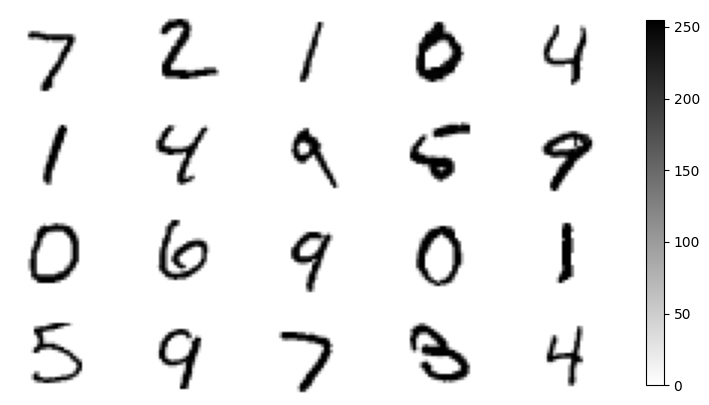

In [4]:
# Display first 20 digits
import matplotlib.pyplot as plt

print(y_test[:20])
fig, axs = plt.subplots(4, 5, figsize=(10, 5))
for i, ax in enumerate(axs.flat):
    im = ax.imshow(X_test[i], cmap=plt.cm.gray_r)
    ax.axis("off")
fig.colorbar(im, ax=axs.ravel().tolist(), shrink=0.95);

## The multiclass classification model

The following functions are utilities to load a subset of the dataset, scale and perform 2D-to-1D conversion on input features, one-hot encode categorical labels, and plot the training history. They are used several times in the programs below.

In [5]:
import matplotlib.pyplot as plt
from tensorflow import keras

def load_mnist_dataset(ratio=0.25):
    (X_train, y_train), (X_test, y_test) = mnist.load_data()
    if ratio < 1:
        sz_train = int(len(X_train) * ratio)
        sz_test = int(len(X_test) * ratio)
        X_train, y_train = X_train[:sz_train], y_train[:sz_train]
        X_test, y_test = X_test[:sz_test], y_test[:sz_test]
        return X_train, y_train, X_test, y_test
    else:
        return X_train, y_train, X_test, y_test

def prep_mnist_features(X_train, X_test):
    X_train_out = X_train.astype(float) / 255  # scale to range 0 to 1
    X_test_out = X_test.astype(float) / 255
    X_train_out = X_train_out.reshape(-1, 28*28)  # convert 2D to 1D
    X_test_out = X_test_out.reshape(-1, 28*28)
    return X_train_out, X_test_out

def one_hot_encode(y_train, y_test, n_categories):
    y_train_oh = keras.utils.to_categorical(y_train, n_categories)
    y_test_oh = keras.utils.to_categorical(y_test, n_categories)
    return y_train_oh, y_test_oh

def plot_history(history):
    plt.figure(figsize=(8, 4))
    plt.subplot(121)
    plt.plot(history.history["loss"], label="loss")
    plt.plot(history.history["val_loss"], label="val_loss")
    plt.legend()
    plt.subplot(122)
    plt.plot(history.history["acc"], label="acc")
    plt.plot(history.history["val_acc"], label="val_acc")
    plt.legend()
    plt.tight_layout()

### Cell Multiclass#1

The code below loads and prepares the dataset; creates, compiles, and trains a Keras model. Note the one-hot encoding operation, softmax neurons of the output layer, and the categorical cross-entropy loss function.

In [6]:
# Cell Multiclass#1

from tensorflow import keras
from tensorflow.keras import layers

keras.utils.set_random_seed(42)
X_train, y_train, X_test, y_test = load_mnist_dataset()
X_train, X_test = prep_mnist_features(X_train, X_test)
y_train, y_test = one_hot_encode(y_train, y_test, 10)

model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(10, activation="softmax")
])

model.compile(loss="categorical_crossentropy", optimizer="adam",
              metrics=["acc"])
history = model.fit(X_train, y_train, epochs=30, batch_size=256,
                    verbose=2, validation_data=(X_test, y_test))

Epoch 1/30
59/59 - 2s - loss: 1.1082 - acc: 0.7019 - val_loss: 0.5835 - val_acc: 0.8392 - 2s/epoch - 27ms/step
Epoch 2/30
59/59 - 1s - loss: 0.3650 - acc: 0.8991 - val_loss: 0.4151 - val_acc: 0.8792 - 527ms/epoch - 9ms/step
Epoch 3/30
59/59 - 1s - loss: 0.2781 - acc: 0.9230 - val_loss: 0.3602 - val_acc: 0.8948 - 516ms/epoch - 9ms/step
Epoch 4/30
59/59 - 1s - loss: 0.2361 - acc: 0.9334 - val_loss: 0.3434 - val_acc: 0.8976 - 547ms/epoch - 9ms/step
Epoch 5/30
59/59 - 1s - loss: 0.2060 - acc: 0.9420 - val_loss: 0.3055 - val_acc: 0.9100 - 535ms/epoch - 9ms/step
Epoch 6/30
59/59 - 1s - loss: 0.1802 - acc: 0.9495 - val_loss: 0.2834 - val_acc: 0.9160 - 522ms/epoch - 9ms/step
Epoch 7/30
59/59 - 0s - loss: 0.1604 - acc: 0.9545 - val_loss: 0.2739 - val_acc: 0.9184 - 316ms/epoch - 5ms/step
Epoch 8/30
59/59 - 0s - loss: 0.1467 - acc: 0.9579 - val_loss: 0.2746 - val_acc: 0.9168 - 343ms/epoch - 6ms/step
Epoch 9/30
59/59 - 0s - loss: 0.1313 - acc: 0.9633 - val_loss: 0.2516 - val_acc: 0.9248 - 344ms/ep

### Cell Multiclass#2

A plot of the training history -- including losses and accuracies -- is shown below.

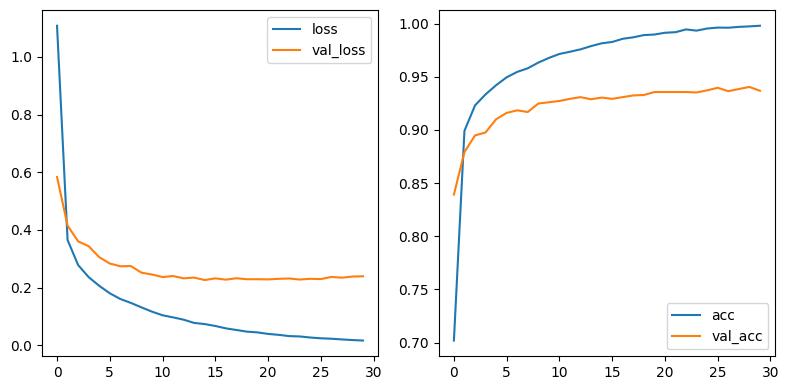

In [7]:
# Cell Multiclass#2

plot_history(history)

The model is used to predict three test examples as follows. The predicted probabilities and one-hot encoded labels are shown. The position of the largest probability in the predicted result and the position of the encoded '1' in a label indicate the digit. For instance, for the first test example, the eighth probability (at index 7) is largest, and the encoded '1' in the label is also at the eighth position (at index 7). Both indicate the digit 7, so the prediction is correct.

In [8]:
y_pred = model.predict(X_test[:3], verbose=0)
print("Predicted: ", y_pred)
print("Actual:    ", y_test[:3])

Predicted:  [[1.75400139e-08 4.01804234e-09 2.58037126e-05 2.27607219e-04
  7.94509680e-10 1.01738076e-08 8.56184926e-16 9.99745190e-01
  8.62109104e-08 1.25870224e-06]
 [2.30755904e-06 1.28421176e-04 9.99720871e-01 1.19866192e-04
  3.85032197e-12 2.47462885e-05 3.19202059e-06 1.41632622e-10
  6.12027463e-07 1.04380315e-11]
 [6.71194528e-07 9.96886194e-01 1.56065158e-03 1.76584275e-04
  1.34189191e-04 2.97241204e-05 1.14447821e-05 6.90654211e-04
  4.84040298e-04 2.57536594e-05]]
Actual:     [[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


Instead of looking at the probabilities and encoded '1' values, it is easier for us to read their indices, which represent the digits. The code below shows the predicted and actual labels of 20 test examples.

In [9]:
y_pred = model.predict(X_test[:30], verbose=0)
print("Predicted: ", y_pred.argmax(axis=1))
print("Actual:    ", y_test[:30].argmax(axis=1))

Predicted:  [7 2 1 0 4 1 4 9 6 9 0 6 9 0 1 5 9 7 8 4 9 6 6 5 4 0 7 4 0 1]
Actual:     [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1]


# Practice - Question 1 of 2

In this question, a neural network is implemented to perform a binary classification task. The MNIST digit dataset is modified for binary classification for our study. The original labels (before one-hot encoding) in the dataset are integers from 0 to 9. We'll modify the labels to be either 0 or 1: 0 if the digit is even, and 1 if the digit is odd.

## Q1a

Modify the multiclass classification model to do binary classification. Specifically, copy the two code cells Multiclass#1 and Multiclass#2 below, and then do the following:

- Import the NumPy module: `import numpy as np`.
- Remove or comment out the line that calls the `one_hot_encode()` function.
- Instead of one-hot encoding, convert the labels to either 0 (for even digits) or 1 (for odd digits) using this code:

    ```python
    y_train = np.where(y_train % 2 == 0, 0, 1)
    y_test = np.where(y_test % 2 == 0, 0, 1)
    ```
- Modify the output layer to use 1 `"sigmoid"` neuron instead of 10 `"softmax"` neurons.
- Modify the `compile()` method call to use `"binary_crossentropy"` instead of `"categorical_crossentropy"` for the loss function.

Remember to execute the two cells in order.

In [10]:
import numpy as np
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train, X_test = X_train / 255.0, X_test / 255.0

X_train = X_train.reshape((X_train.shape[0], -1))
X_test = X_test.reshape((X_test.shape[0], -1))

y_train = np.where(y_train % 2 == 0, 0, 1)
y_test = np.where(y_test % 2 == 0, 0, 1)

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential([
Dense(64, activation='relu', input_shape=(784,)),
Dense(32, activation='relu'),
Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, verbose=2)

model.evaluate(X_test, y_test, verbose=2)

Epoch 1/10
1875/1875 - 6s - loss: 0.1209 - accuracy: 0.9543 - 6s/epoch - 3ms/step
Epoch 2/10
1875/1875 - 6s - loss: 0.0548 - accuracy: 0.9806 - 6s/epoch - 3ms/step
Epoch 3/10
1875/1875 - 7s - loss: 0.0409 - accuracy: 0.9856 - 7s/epoch - 4ms/step
Epoch 4/10
1875/1875 - 5s - loss: 0.0313 - accuracy: 0.9892 - 5s/epoch - 3ms/step
Epoch 5/10
1875/1875 - 5s - loss: 0.0248 - accuracy: 0.9915 - 5s/epoch - 2ms/step
Epoch 6/10
1875/1875 - 5s - loss: 0.0221 - accuracy: 0.9919 - 5s/epoch - 2ms/step
Epoch 7/10
1875/1875 - 5s - loss: 0.0177 - accuracy: 0.9936 - 5s/epoch - 3ms/step
Epoch 8/10
1875/1875 - 5s - loss: 0.0142 - accuracy: 0.9951 - 5s/epoch - 2ms/step
Epoch 9/10
1875/1875 - 6s - loss: 0.0124 - accuracy: 0.9958 - 6s/epoch - 3ms/step
Epoch 10/10
1875/1875 - 4s - loss: 0.0112 - accuracy: 0.9959 - 4s/epoch - 2ms/step
313/313 - 1s - loss: 0.0608 - accuracy: 0.9864 - 600ms/epoch - 2ms/step


[0.060796111822128296, 0.9864000082015991]

## Q1b

The following code uses the model to predict for a few test examples, showing the predicted probabilities (for odd digits) and the actual labels (0 for even digits and 1 for odd digits).

In [12]:
y_pred = model.predict(X_test[:10], verbose=0)
print("Predicted: ", y_pred.ravel().round(2))
print("Actual:    ", y_test[:10])

Predicted:  [1.   0.   1.   0.   0.   1.   0.   1.   0.08 1.  ]
Actual:     [1 0 1 0 0 1 0 1 1 1]


Write code below to do the same prediction, but display the outputs in a different way. Instead of showing the probabilities and 0/1 label values, print "odd" for a probability above 0.5 and for a "1" label, and print "even" for a probability below or equal to 0.5 and for a "0" label. Show the predicted and actual values in a clear and easy-to-compare way, and not necessarily in two lines.

In [13]:
y_pred = model.predict(X_test[:10], verbose=0)
for i in range(len(y_pred)):
    if y_pred[i] > 0.5:
        prediction = "odd"
    else:
        prediction = "even"
    actual = "odd" if y_test[i] == 1 else "even"
    print(f"Example {i+1}: Predicted - {prediction}, Actual - {actual}")

Example 1: Predicted - odd, Actual - odd
Example 2: Predicted - even, Actual - even
Example 3: Predicted - odd, Actual - odd
Example 4: Predicted - even, Actual - even
Example 5: Predicted - even, Actual - even
Example 6: Predicted - odd, Actual - odd
Example 7: Predicted - even, Actual - even
Example 8: Predicted - odd, Actual - odd
Example 9: Predicted - even, Actual - odd
Example 10: Predicted - odd, Actual - odd


## Q1c

In the above, two neural networks were implemented for two tasks: classifying 10 digits and classifying old and even digits. Discuss which of the tasks is more difficult for the neural network; refer to the performance results of the networks in your discussion. Write your answer in a text cell below.

Solution:


<div class='alert alert-warning' role='alert'><b>Classifying 10 digits is mor edifficult , since the neural network need to learn 10 different digits , this require network learn more complex decision making and the different between potential classes , when more class , in increase the difficult of learning and finish the question . But thge other side , the network only need to learn 2 class which is old  and even , this make network no need to learn a more complex decision boundary and differentiate between a larger number of potential classes  , making it easier for the network to learn . </b></div>


## &#x2766;

# Designing a neural network model

In the preceding lesson, you used the wine_quality dataset of TensorFlow Datasets (tfds) for a regression task. The same dataset can also be used for a classification task. As the label is an evaluation score between 0 and 10 (an integer), it may be considered as either a number or 1 out of 11 categories. Of course, a regression model and a classification model would have different performance in predicting the labels. The performance, however, depends on many factors as you have learned in the preceding lesson. Let's try a classification model next.

The following `load_wine_quality()` function loads the wine_quality dataset.

In [14]:
import numpy as np
import tensorflow_datasets as tfds

LABEL_COL = "quality"

def load_wine_quality(train_ratio=0.8):
    train_percent = int(train_ratio * 100)
    (train_set, test_set), info = tfds.load(
        "wine_quality", as_supervised=True, with_info=True,
        split=[f"train[:{train_percent}%]", f"train[{train_percent}%:]"])
    train_df = tfds.as_dataframe(train_set, info)
    test_df = tfds.as_dataframe(test_set, info)
    X_train = train_df.drop(columns=LABEL_COL).values
    y_train = train_df[LABEL_COL].values
    X_test = test_df.drop(columns=LABEL_COL).values
    y_test = test_df[LABEL_COL].values
    return X_train, y_train, X_test, y_test

This code loads the dataset and displays the dimensions of the dataset. The training set contains 3918 examples, and the test set contains 980 examples. An example has 11 features and a label.

In [15]:
X_train, y_train, X_test, y_test = load_wine_quality()
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/4898 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/wine_quality/white/1.0.0.incompleteHBRPOI/wine_quality-train.tfrecord*...:…

Dataset wine_quality downloaded and prepared to /root/tensorflow_datasets/wine_quality/white/1.0.0. Subsequent calls will reuse this data.
(3918, 11) (3918,) (980, 11) (980,)


The following utility function normalizes input features.

In [16]:
# Normalize input features
def normalize_features(X_train, X_test):
    mean = X_train.mean(axis=0)  # mean values of features
    std = X_train.std(axis=0)  # SD values of features
    X_train_normalized = (X_train - mean) / std
    X_test_normalized = (X_test - mean) / std
    return X_train_normalized, X_test_normalized

# Practice - Question 2 of 2

## Q2a

Write code to train a multiclass classification model for the wine_quality dataset. Specifically:

- load the wine_quality dataset,
- normalize the features (use `normalize_features()`)
- one-hot encode the labels (to 11 categories),
- create a Keras model,
- compile the model,
- train the model, and
- plot the training history.

Try different components in the model design in order to improve the model performance. A validation accuracy above 0.56 is acceptable; you are not required to search extensively for the highest accuracy. Submit the best model of your choice, and keep its execution output.

These are some suggestions, but not requirements, of possible components that you may try:

- 1 to 3 hidden layers,
- 8 to 64 neurons in a hidden layer,
- ReLU, sigmoid, or tanh neurons in the hidden layer,
- SGD, Adam, or RMSProp optimizer, and
- 10 to 50 training epochs.

In [22]:
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

# Determine the number of unique classes
num_classes = 11

# Load and normalized the wine_quality dataset
X_train, y_train, X_test, y_test = load_wine_quality()
X_train_normalized, X_test_normalized = normalize_features(X_train, X_test)

# One-hot encode the labels
label_encoder = LabelEncoder()
y_train_one_hot = to_categorical(y_train, num_classes)
y_test_one_hot = to_categorical(y_test, num_classes)

# Create a Keras model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(11,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_normalized, y_train_one_hot, epochs=30, batch_size=32, validation_data=(X_test_normalized, y_test_one_hot))



Epoch 1/30
123/123 [==============================] - 1s 4ms/step - loss: 1.5523 - accuracy: 0.4558 - val_loss: 1.2150 - val_accuracy: 0.5245
Epoch 2/30
123/123 [==============================] - 0s 3ms/step - loss: 1.1704 - accuracy: 0.5370 - val_loss: 1.1134 - val_accuracy: 0.5459
Epoch 3/30
123/123 [==============================] - 0s 3ms/step - loss: 1.1124 - accuracy: 0.5467 - val_loss: 1.0728 - val_accuracy: 0.5612
Epoch 4/30
123/123 [==============================] - 0s 3ms/step - loss: 1.0827 - accuracy: 0.5658 - val_loss: 1.0558 - val_accuracy: 0.5684
Epoch 5/30
123/123 [==============================] - 0s 2ms/step - loss: 1.0624 - accuracy: 0.5679 - val_loss: 1.0440 - val_accuracy: 0.5663
Epoch 6/30
123/123 [==============================] - 0s 3ms/step - loss: 1.0501 - accuracy: 0.5689 - val_loss: 1.0346 - val_accuracy: 0.5612
Epoch 7/30
123/123 [==============================] - 0s 3ms/step - loss: 1.0364 - accuracy: 0.5664 - val_loss: 1.0209 - val_accuracy: 0.5724
Epoch 

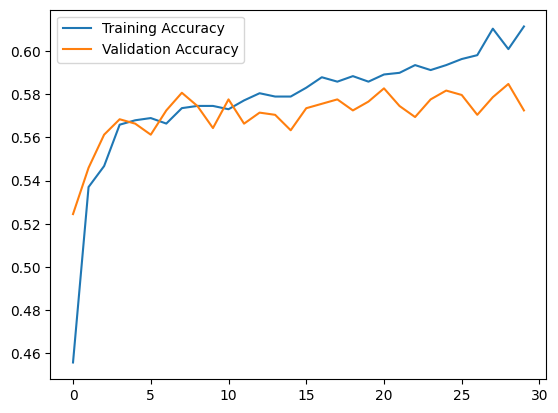

In [23]:
import matplotlib.pyplot as plt

# Plot the training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

## &#x2766;

You may use the following code to do prediction using the trained model.

In [25]:
y_pred = model.predict(X_test[:30], verbose=0)
print("Predicted: ", y_pred.argmax(axis=1))
print("Actual:    ", y_test[:30].argmax(axis=1))

Predicted:  [6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6]


AxisError: axis 1 is out of bounds for array of dimension 1

# Extras

## Sparse categorical cross-entropy

For multiclass classification, a general recommendation is one-hot encoding the labels and using categorical cross-entropy as the loss function. Another option is integer encoding the labels and using sparse categorical cross-entropy as the loss function. Integer encoding means representing the label categories as integer values, such as 0 for the first category, 1 for the second category, and so on. Such an encoding scheme may be more natural to programmers and commonly used in datasets.

### E1a

Modify the multiclass classification model for the MNIST dataset to use sparse categorical cross-entropy. Specifically, copy the two code cells Multiclass#1 and Multiclass#2 below, and then do the following:

- Remove or comment out the line that calls the `one_hot_encode()` function.
- Modify the `compile()` method call to use `"sparse_categorical_crossentropy"` instead of `"categorical_crossentropy"` for the loss function.

Remember to execute the two cells in order.

Compare the validation loss and the training history to those of the original multiclass classification model that uses categorical cross-entropy.

### E1b

Re-implement the neural network for the wine_quality dataset in question 2 to use sparse categorical cross-entropy instead of categorical cross-entropy. Remember not to one-hot encode the labels.

## Solutions to extra exercises

### E1a

In [ ]:
# Solution

from tensorflow import keras
from tensorflow.keras import layers

keras.utils.set_random_seed(42)
X_train, y_train, X_test, y_test = load_mnist_dataset()
X_train, X_test = prep_mnist_features(X_train, X_test)
# y_train, y_test = one_hot_encode(y_train, y_test, 10)

model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(10, activation="softmax")
])

model.compile(loss="sparse_categorical_crossentropy", optimizer="adam",
              metrics=["acc"])
history = model.fit(X_train, y_train, epochs=30, batch_size=256,
                    verbose=2, validation_data=(X_test, y_test))

Epoch 1/30


59/59 - 1s - loss: 1.1082 - acc: 0.7019 - val_loss: 0.5835 - val_acc: 0.8392 - 927ms/epoch - 16ms/step


Epoch 2/30


59/59 - 0s - loss: 0.3650 - acc: 0.8993 - val_loss: 0.4150 - val_acc: 0.8800 - 238ms/epoch - 4ms/step


Epoch 3/30


59/59 - 0s - loss: 0.2784 - acc: 0.9228 - val_loss: 0.3601 - val_acc: 0.8924 - 215ms/epoch - 4ms/step


Epoch 4/30


59/59 - 0s - loss: 0.2360 - acc: 0.9333 - val_loss: 0.3441 - val_acc: 0.8964 - 219ms/epoch - 4ms/step


Epoch 5/30


59/59 - 0s - loss: 0.2062 - acc: 0.9419 - val_loss: 0.3049 - val_acc: 0.9100 - 214ms/epoch - 4ms/step


Epoch 6/30


59/59 - 0s - loss: 0.1802 - acc: 0.9491 - val_loss: 0.2827 - val_acc: 0.9180 - 220ms/epoch - 4ms/step


Epoch 7/30


59/59 - 0s - loss: 0.1602 - acc: 0.9545 - val_loss: 0.2725 - val_acc: 0.9196 - 214ms/epoch - 4ms/step


Epoch 8/30


59/59 - 0s - loss: 0.1460 - acc: 0.9582 - val_loss: 0.2737 - val_acc: 0.9172 - 212ms/epoch - 4ms/step


Epoch 9/30


59/59 - 0s - loss: 0.1302 - acc: 0.9627 - val_loss: 0.2510 - val_acc: 0.9264 - 205ms/epoch - 3ms/step


Epoch 10/30


59/59 - 0s - loss: 0.1158 - acc: 0.9681 - val_loss: 0.2427 - val_acc: 0.9300 - 211ms/epoch - 4ms/step


Epoch 11/30


59/59 - 0s - loss: 0.1037 - acc: 0.9709 - val_loss: 0.2356 - val_acc: 0.9288 - 209ms/epoch - 4ms/step


Epoch 12/30


59/59 - 0s - loss: 0.0962 - acc: 0.9738 - val_loss: 0.2389 - val_acc: 0.9284 - 227ms/epoch - 4ms/step


Epoch 13/30


59/59 - 0s - loss: 0.0885 - acc: 0.9759 - val_loss: 0.2316 - val_acc: 0.9296 - 220ms/epoch - 4ms/step


Epoch 14/30


59/59 - 0s - loss: 0.0781 - acc: 0.9776 - val_loss: 0.2344 - val_acc: 0.9308 - 209ms/epoch - 4ms/step


Epoch 15/30


59/59 - 0s - loss: 0.0738 - acc: 0.9803 - val_loss: 0.2246 - val_acc: 0.9304 - 214ms/epoch - 4ms/step


Epoch 16/30


59/59 - 0s - loss: 0.0673 - acc: 0.9822 - val_loss: 0.2302 - val_acc: 0.9312 - 250ms/epoch - 4ms/step


Epoch 17/30


59/59 - 0s - loss: 0.0589 - acc: 0.9855 - val_loss: 0.2247 - val_acc: 0.9316 - 204ms/epoch - 3ms/step


Epoch 18/30


59/59 - 0s - loss: 0.0534 - acc: 0.9869 - val_loss: 0.2320 - val_acc: 0.9324 - 207ms/epoch - 4ms/step


Epoch 19/30


59/59 - 0s - loss: 0.0478 - acc: 0.9884 - val_loss: 0.2273 - val_acc: 0.9340 - 252ms/epoch - 4ms/step


Epoch 20/30


59/59 - 0s - loss: 0.0452 - acc: 0.9902 - val_loss: 0.2280 - val_acc: 0.9344 - 198ms/epoch - 3ms/step


Epoch 21/30


59/59 - 0s - loss: 0.0397 - acc: 0.9910 - val_loss: 0.2255 - val_acc: 0.9344 - 208ms/epoch - 4ms/step


Epoch 22/30


59/59 - 0s - loss: 0.0363 - acc: 0.9919 - val_loss: 0.2294 - val_acc: 0.9380 - 238ms/epoch - 4ms/step


Epoch 23/30


59/59 - 0s - loss: 0.0320 - acc: 0.9941 - val_loss: 0.2275 - val_acc: 0.9336 - 231ms/epoch - 4ms/step


Epoch 24/30


59/59 - 0s - loss: 0.0311 - acc: 0.9931 - val_loss: 0.2266 - val_acc: 0.9340 - 215ms/epoch - 4ms/step


Epoch 25/30


59/59 - 0s - loss: 0.0270 - acc: 0.9951 - val_loss: 0.2327 - val_acc: 0.9352 - 217ms/epoch - 4ms/step


Epoch 26/30


59/59 - 0s - loss: 0.0247 - acc: 0.9955 - val_loss: 0.2286 - val_acc: 0.9372 - 221ms/epoch - 4ms/step


Epoch 27/30


59/59 - 0s - loss: 0.0228 - acc: 0.9961 - val_loss: 0.2393 - val_acc: 0.9328 - 212ms/epoch - 4ms/step


Epoch 28/30


59/59 - 0s - loss: 0.0205 - acc: 0.9967 - val_loss: 0.2373 - val_acc: 0.9336 - 218ms/epoch - 4ms/step


Epoch 29/30


59/59 - 0s - loss: 0.0182 - acc: 0.9973 - val_loss: 0.2403 - val_acc: 0.9400 - 205ms/epoch - 3ms/step


Epoch 30/30


59/59 - 0s - loss: 0.0164 - acc: 0.9977 - val_loss: 0.2373 - val_acc: 0.9360 - 203ms/epoch - 3ms/step


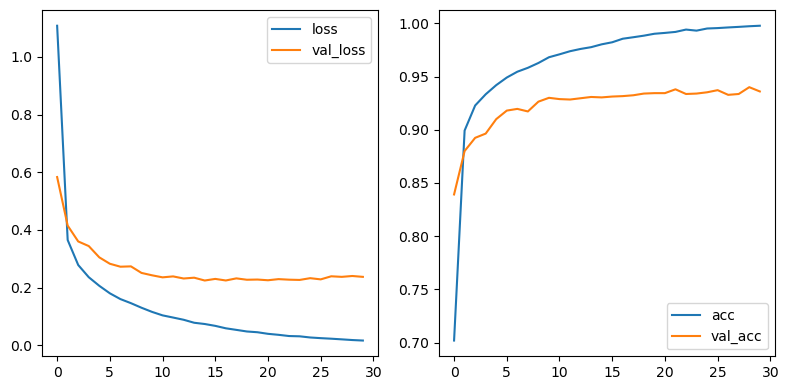

In [ ]:
# Solution

plot_history(history)

The final validation loss and the training history are identical to those of the original model that uses categorical cross-entropy.

### E1b

In [ ]:
# Solution

from tensorflow import keras
from tensorflow.keras import layers

keras.utils.set_random_seed(42)
X_train, y_train, X_test, y_test = load_wine_quality()
X_train, X_test = normalize_features(X_train, X_test)
# y_train, y_test = one_hot_encode(y_train, y_test, 11)

model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(11, activation="softmax")
])

model.compile(loss="sparse_categorical_crossentropy", optimizer="adam",
              metrics=["acc"])
history = model.fit(X_train, y_train, epochs=50, batch_size=256,
                    verbose=2, validation_data=(X_test, y_test))

Epoch 1/50


16/16 - 1s - loss: 2.4447 - acc: 0.2195 - val_loss: 2.1002 - val_acc: 0.3153 - 732ms/epoch - 46ms/step


Epoch 2/50


16/16 - 0s - loss: 1.9269 - acc: 0.3014 - val_loss: 1.6689 - val_acc: 0.3541 - 52ms/epoch - 3ms/step


Epoch 3/50


16/16 - 0s - loss: 1.5402 - acc: 0.4390 - val_loss: 1.3674 - val_acc: 0.5163 - 51ms/epoch - 3ms/step


Epoch 4/50


16/16 - 0s - loss: 1.3216 - acc: 0.5140 - val_loss: 1.2392 - val_acc: 0.5378 - 52ms/epoch - 3ms/step


Epoch 5/50


16/16 - 0s - loss: 1.2343 - acc: 0.5219 - val_loss: 1.1779 - val_acc: 0.5480 - 52ms/epoch - 3ms/step


Epoch 6/50


16/16 - 0s - loss: 1.1826 - acc: 0.5383 - val_loss: 1.1414 - val_acc: 0.5449 - 52ms/epoch - 3ms/step


Epoch 7/50


16/16 - 0s - loss: 1.1513 - acc: 0.5521 - val_loss: 1.1152 - val_acc: 0.5469 - 53ms/epoch - 3ms/step


Epoch 8/50


16/16 - 0s - loss: 1.1300 - acc: 0.5531 - val_loss: 1.0964 - val_acc: 0.5490 - 54ms/epoch - 3ms/step


Epoch 9/50


16/16 - 0s - loss: 1.1119 - acc: 0.5531 - val_loss: 1.0820 - val_acc: 0.5602 - 49ms/epoch - 3ms/step


Epoch 10/50


16/16 - 0s - loss: 1.0985 - acc: 0.5539 - val_loss: 1.0729 - val_acc: 0.5561 - 70ms/epoch - 4ms/step


Epoch 11/50


16/16 - 0s - loss: 1.0883 - acc: 0.5613 - val_loss: 1.0638 - val_acc: 0.5633 - 52ms/epoch - 3ms/step


Epoch 12/50


16/16 - 0s - loss: 1.0787 - acc: 0.5597 - val_loss: 1.0545 - val_acc: 0.5602 - 47ms/epoch - 3ms/step


Epoch 13/50


16/16 - 0s - loss: 1.0711 - acc: 0.5567 - val_loss: 1.0491 - val_acc: 0.5643 - 48ms/epoch - 3ms/step


Epoch 14/50


16/16 - 0s - loss: 1.0630 - acc: 0.5636 - val_loss: 1.0449 - val_acc: 0.5663 - 53ms/epoch - 3ms/step


Epoch 15/50


16/16 - 0s - loss: 1.0579 - acc: 0.5607 - val_loss: 1.0388 - val_acc: 0.5755 - 62ms/epoch - 4ms/step


Epoch 16/50


16/16 - 0s - loss: 1.0513 - acc: 0.5674 - val_loss: 1.0357 - val_acc: 0.5714 - 50ms/epoch - 3ms/step


Epoch 17/50


16/16 - 0s - loss: 1.0474 - acc: 0.5679 - val_loss: 1.0366 - val_acc: 0.5592 - 55ms/epoch - 3ms/step


Epoch 18/50


16/16 - 0s - loss: 1.0419 - acc: 0.5648 - val_loss: 1.0316 - val_acc: 0.5827 - 47ms/epoch - 3ms/step


Epoch 19/50


16/16 - 0s - loss: 1.0376 - acc: 0.5704 - val_loss: 1.0311 - val_acc: 0.5633 - 49ms/epoch - 3ms/step


Epoch 20/50


16/16 - 0s - loss: 1.0326 - acc: 0.5679 - val_loss: 1.0265 - val_acc: 0.5827 - 57ms/epoch - 4ms/step


Epoch 21/50


16/16 - 0s - loss: 1.0280 - acc: 0.5692 - val_loss: 1.0202 - val_acc: 0.5857 - 48ms/epoch - 3ms/step


Epoch 22/50


16/16 - 0s - loss: 1.0235 - acc: 0.5733 - val_loss: 1.0242 - val_acc: 0.5714 - 45ms/epoch - 3ms/step


Epoch 23/50


16/16 - 0s - loss: 1.0197 - acc: 0.5745 - val_loss: 1.0165 - val_acc: 0.5929 - 46ms/epoch - 3ms/step


Epoch 24/50


16/16 - 0s - loss: 1.0171 - acc: 0.5786 - val_loss: 1.0180 - val_acc: 0.5918 - 48ms/epoch - 3ms/step


Epoch 25/50


16/16 - 0s - loss: 1.0129 - acc: 0.5720 - val_loss: 1.0184 - val_acc: 0.5867 - 46ms/epoch - 3ms/step


Epoch 26/50


16/16 - 0s - loss: 1.0095 - acc: 0.5791 - val_loss: 1.0195 - val_acc: 0.5643 - 63ms/epoch - 4ms/step


Epoch 27/50


16/16 - 0s - loss: 1.0050 - acc: 0.5753 - val_loss: 1.0098 - val_acc: 0.5898 - 47ms/epoch - 3ms/step


Epoch 28/50


16/16 - 0s - loss: 1.0022 - acc: 0.5768 - val_loss: 1.0112 - val_acc: 0.5827 - 50ms/epoch - 3ms/step


Epoch 29/50


16/16 - 0s - loss: 0.9992 - acc: 0.5743 - val_loss: 1.0063 - val_acc: 0.5837 - 62ms/epoch - 4ms/step


Epoch 30/50


16/16 - 0s - loss: 0.9948 - acc: 0.5789 - val_loss: 1.0070 - val_acc: 0.5857 - 47ms/epoch - 3ms/step


Epoch 31/50


16/16 - 0s - loss: 0.9899 - acc: 0.5766 - val_loss: 1.0031 - val_acc: 0.5796 - 55ms/epoch - 3ms/step


Epoch 32/50


16/16 - 0s - loss: 0.9868 - acc: 0.5778 - val_loss: 1.0030 - val_acc: 0.5867 - 56ms/epoch - 4ms/step


Epoch 33/50


16/16 - 0s - loss: 0.9820 - acc: 0.5845 - val_loss: 1.0052 - val_acc: 0.5694 - 48ms/epoch - 3ms/step


Epoch 34/50


16/16 - 0s - loss: 0.9806 - acc: 0.5814 - val_loss: 1.0006 - val_acc: 0.5776 - 51ms/epoch - 3ms/step


Epoch 35/50


16/16 - 0s - loss: 0.9764 - acc: 0.5812 - val_loss: 0.9990 - val_acc: 0.5786 - 51ms/epoch - 3ms/step


Epoch 36/50


16/16 - 0s - loss: 0.9753 - acc: 0.5814 - val_loss: 0.9987 - val_acc: 0.5878 - 47ms/epoch - 3ms/step


Epoch 37/50


16/16 - 0s - loss: 0.9720 - acc: 0.5840 - val_loss: 1.0048 - val_acc: 0.5633 - 46ms/epoch - 3ms/step


Epoch 38/50


16/16 - 0s - loss: 0.9710 - acc: 0.5845 - val_loss: 0.9987 - val_acc: 0.5827 - 60ms/epoch - 4ms/step


Epoch 39/50


16/16 - 0s - loss: 0.9655 - acc: 0.5860 - val_loss: 0.9944 - val_acc: 0.5837 - 47ms/epoch - 3ms/step


Epoch 40/50


16/16 - 0s - loss: 0.9642 - acc: 0.5837 - val_loss: 0.9992 - val_acc: 0.5765 - 46ms/epoch - 3ms/step


Epoch 41/50


16/16 - 0s - loss: 0.9593 - acc: 0.5898 - val_loss: 0.9951 - val_acc: 0.5735 - 51ms/epoch - 3ms/step


Epoch 42/50


16/16 - 0s - loss: 0.9567 - acc: 0.5909 - val_loss: 0.9937 - val_acc: 0.5745 - 51ms/epoch - 3ms/step


Epoch 43/50


16/16 - 0s - loss: 0.9547 - acc: 0.5888 - val_loss: 0.9945 - val_acc: 0.5796 - 49ms/epoch - 3ms/step


Epoch 44/50


16/16 - 0s - loss: 0.9495 - acc: 0.5937 - val_loss: 0.9922 - val_acc: 0.5776 - 56ms/epoch - 3ms/step


Epoch 45/50


16/16 - 0s - loss: 0.9484 - acc: 0.5904 - val_loss: 0.9918 - val_acc: 0.5806 - 61ms/epoch - 4ms/step


Epoch 46/50


16/16 - 0s - loss: 0.9445 - acc: 0.5952 - val_loss: 0.9948 - val_acc: 0.5765 - 49ms/epoch - 3ms/step


Epoch 47/50


16/16 - 0s - loss: 0.9421 - acc: 0.5942 - val_loss: 0.9899 - val_acc: 0.5816 - 54ms/epoch - 3ms/step


Epoch 48/50


16/16 - 0s - loss: 0.9403 - acc: 0.5975 - val_loss: 0.9919 - val_acc: 0.5786 - 50ms/epoch - 3ms/step


Epoch 49/50


16/16 - 0s - loss: 0.9372 - acc: 0.5952 - val_loss: 0.9874 - val_acc: 0.5837 - 61ms/epoch - 4ms/step


Epoch 50/50


16/16 - 0s - loss: 0.9335 - acc: 0.5983 - val_loss: 0.9891 - val_acc: 0.5786 - 46ms/epoch - 3ms/step


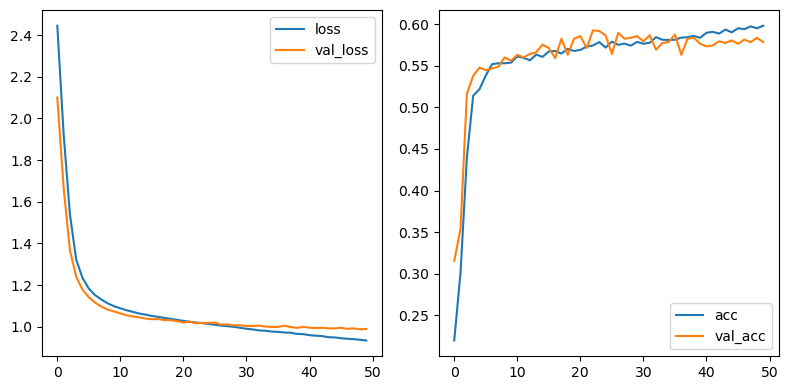

In [ ]:
# Solution
plot_history(history)

## &#x2766;